COMP5310 ASSIGNMENT 2
--

# GROUP COMPONENT 1


### Preliminary Changes to Data 
In the previous Dataset, we made a few changes we cleaned the 'Rent' and 'Cost' Column in the previous dataset and calculated a Cost to Rent Ratio, and created a column for the purpose then we grouped the 'listing type' and 'Cost_Rent_ratio' column to fill the missing values which were there in the 'Cost column' using the groupby() function.
Additionally, we have also a function cleanprice() to extract the cleaned price using the python regex library which is later that we have set as the target variable as  the 'Total Rent (in €)'.
Additionally I have also changed the data type of the columns 'Bathrooms', 'Bedrooms', and 'Toilets' to integer data type.

### Data split for train/validation/test sets:
All the Data Splitting steps is managed individually and we have splitted the data accordinly based on the model that we are selecting as due to differnet choices of Data preprocessing, Feature Engineering and Feature scaling.
The Cleaning and Data Preprocessing step is done by the individual section of the Assignement2

## INDIVIDUAL COMPONENT 1: msha0502

In [155]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import statsmodels.api as sm
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance

In [156]:
# Using the read_csv function from pandas to read the csv file
df = pd.read_csv("CleanedData.csv")

In [157]:
# Using head() function from the pandas to quickly have a glance on the data 
df.head()

,Unnamed: 0,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,Rent (in €),Additional Costs (in €),Tenement,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
0,1,3,Installed,2,1,1,234,Not specified,49,Gas,No,1150,200.0,No,Apartment,90,No,As new,Unknown,1350
1,2,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,1200,80.0,No,Apartment,90,Unknown,Good,No,1280
2,4,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,960,80.0,No,Apartment,70,Yes,As new,Yes,1040
3,6,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,1050,150.0,No,Apartment,50,Yes,Just renovated,No,1200
4,7,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,1250,200.0,No,Apartment,60,Yes,Just renovated,No,1450


In [158]:
# dropping the first column which is unnecessary as it is not required
df = df.drop(["Unnamed: 0"], axis=1)

In [159]:
#This will give us the quick summary of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Floor                                   2146 non-null   int64  
 1   Kitchen                                 2146 non-null   object 
 2   Bedrooms                                2146 non-null   int64  
 3   Bathrooms                               2146 non-null   int64  
 4   Toilets                                 2146 non-null   int64  
 5   Primary Energy Consumption (in kWh/m²)  2146 non-null   int64  
 6   Energy Class                            2146 non-null   object 
 7   CO₂ emission                            2146 non-null   int64  
 8   Heating Type                            2146 non-null   object 
 9   Double Glazing                          2146 non-null   object 
 10  Rent (in €)                             2146 non-null   int6

In [160]:
# Our target variable is Total Rent (in €) we will see a few statistic. let us analyze the range to see the spread of the target variable
print("Minimum value of target variable: ", min(df["Total Rent (in €)"]))
print("Maximum value of target varibale: ", max(df["Total Rent (in €)"]))

Minimum value of target variable:  470
Maximum value of target varibale:  2800


In [161]:
No_count_tenement = df[df['Tenement'].str.strip().str.lower() == 'no'].shape[0]
print("Percentage of No in Tenement is:", (No_count_tenement/df.shape[0]) * 100,"%.")

Percentage of No in Tenement is: 100.0 %.


In [162]:
# It is better to drop the Tenement column as it does not provide any values as a feature, which will not influence the Total Rent of the House
df = df.drop(columns=['Tenement'])
df.head(10)

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,Rent (in €),Additional Costs (in €),House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
0,3,Installed,2,1,1,234,Not specified,49,Gas,No,1150,200.00,Apartment,90,No,As new,Unknown,1350
1,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,1200,80.00,Apartment,90,Unknown,Good,No,1280
2,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,960,80.00,Apartment,70,Yes,As new,Yes,1040
3,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,1050,150.00,Apartment,50,Yes,Just renovated,No,1200
4,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,1250,200.00,Apartment,60,Yes,Just renovated,No,1450
5,0,Installed,1,1,1,86,B,17,Gas,Yes,900,130.00,Apartment,60,No,As new,Yes,1030
6,1,Installed,2,1,1,252,Not specified,54,Gas,Yes,625,105.00,Studio,40,No,As new,Yes,730
7,6,Hyper equipped,1,1,1,407,G,87,Gas,Yes,1250,144.58,Apartment,90,No,As new,Yes,1250
8,1,Not installed,1,1,1,407,G,87,Gas,Yes,980,113.35,Apartment,70,No,As new,Unknown,980
9,3,Installed,1,1,1,245,Not specified,53,Gas,Yes,950,138.51,Studio,45,Yes,Just renovated,No,950


## DEALING WITH MULTICOLLINEARITY

In my cleaned dataset, I have observed that the correlation of the Rent (in €) and Total Rent (in €) is equal to 0.98, the correlation between the Rent (in €) and Living Area (in m²) is equal to 0.76 and the correlation between the Living Area (in m²) and Total Rent (in €) is equal to 0.75.

The High correlation between the features will lead to high variance and will also potentially worsen its generalizability.

By observation I have decided to drop the  'Rent (in €)' column as the  Total Rent (in €) column already has the information of the Rent (in €) column as during the cleaning process we have determined the  Total Rent (in €) is addition of Rent (in €) and Additional Costs (in €).


In [163]:
df = df.drop(columns=['Rent (in €)'])

In [164]:
# There is not much difference in the value for transformation lets us analyze the numerical and the categorical data.
# I am also separating the target variable {Total Rent (in €)} with the rest of the columns in the dataset
y = df['Total Rent (in €)']
y = np.log(y)
X = df.drop("Total Rent (in €)",axis = 1)

SPLITTING THE DATA 
--
1.) Training  Set is used to help the model learn the underlying patterns and relationships in the data. A larger training set usually leads to better generalisation capabilities for the model.

2.) Validation Set is used to optimise hyperparameters. It aids in evaluating the model's performance on previously unseen data and guiding adjustments to improve the model. The performance on this set influences decisions about hyperparameter selection and model improvement.

3.) Testing Set is used to evaluate the final model's performance. It simulates real-world scenarios in which the model encounters entirely new data, providing an unbiased assessment of its generalisation ability.

In [165]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2)

In [166]:
# The length of Training Data
print("The length of X_train : ", len(X_train))
print("The length of y_train: ", len(y_train))
print()
# The length of the Validation Data
print("The length of X_valid: ", len(X_valid))
print("The length of y_valid: ", len(y_valid))
print()
# The length of the Testing Data
print("The length of X_test: ", len(X_test))
print("The length of y_test: ", len(y_test))


The length of X_train :  1372
The length of y_train:  1372

The length of X_valid:  344
The length of y_valid:  344

The length of X_test:  430
The length of y_test:  430


In [167]:
df.isna().mean().sort_values(ascending = False)

Floor                                     0.0
Kitchen                                   0.0
Bedrooms                                  0.0
Bathrooms                                 0.0
Toilets                                   0.0
Primary Energy Consumption (in kWh/m²)    0.0
Energy Class                              0.0
CO₂ emission                              0.0
Heating Type                              0.0
Double Glazing                            0.0
Additional Costs (in €)                   0.0
House Type                                0.0
Living Area (in m²)                       0.0
Furnished                                 0.0
Building Condition                        0.0
Elevator                                  0.0
Total Rent (in €)                         0.0
dtype: float64

# FEATURE ENGINEERING


In [168]:
categorical_columns = list(X_train.select_dtypes(include="object").columns)

In [169]:
# We will be seprating the columns for the specific encoding and making it suitable for the data 
ordinal_columns = ['Energy Class', 'Heating Type']
onehot_columns = [col for col in categorical_columns if col not in ordinal_columns]

## One Hot Encoding

To manage the Issue of Data Leakage I am doing the feature engineering like one hot encoding separately for training, testing and validation data.
So that whenever the Model is Exposed tothe unknown Data then it should not alter with the evaluation metric of the store.
One Hot Encoder will create a new column for each of the category in each of the categorical column 

In [170]:
# We will instantiate the One Hot Encoder 
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [171]:
# One Hot Encoding for Full X_train
X_train_full_OHE = pd.DataFrame(onehot_encoder.fit_transform(X_train_full[onehot_columns]),columns=onehot_encoder.get_feature_names_out(onehot_columns))

# One Hot Encoding for X_train
X_train_OHE = pd.DataFrame(onehot_encoder.transform(X_train[onehot_columns]),columns=onehot_encoder.get_feature_names_out(onehot_columns))

# One Hot Encoding for X_valid
X_valid_OHE = pd.DataFrame(onehot_encoder.transform(X_valid[onehot_columns]),columns=onehot_encoder.get_feature_names_out(onehot_columns))

#One Hot Encoding for X_test
X_test_OHE = pd.DataFrame(onehot_encoder.transform(X_test[onehot_columns]),columns=onehot_encoder.get_feature_names_out(onehot_columns))

In [172]:
X_train_full_OHE.head()

,Kitchen_Hyper equipped,Kitchen_Installed,Kitchen_Not installed,Kitchen_Semi equipped,Kitchen_USA hyper equipped,Kitchen_USA installed,Kitchen_USA semi equipped,Kitchen_USA uninstalled,Double Glazing_No,Double Glazing_Yes,...,Furnished_Yes,Building Condition_As new,Building Condition_Good,Building Condition_Just renovated,Building Condition_To be done up,Building Condition_To renovate,Building Condition_To restore,Elevator_No,Elevator_Unknown,Elevator_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


I have combined the encoded columns from the One Hot Encoding and Ordinal Encoding

In [173]:
X_train_full_OHE.index = X_train_full.index
X_train_OHE.index = X_train.index
X_valid_OHE.index = X_valid.index
X_test_OHE.index = X_test.index

## Ordinal Encoding

We have two columns in the dataset that require an ordinal encoding since they contain a specific sort of rating that must be mapped appropriately. In the Energy Class and Heating Type columns, the rankings are as follows: {'Not specified': 0, 'G': 1, 'F': 2, 'E': 3, 'D': 4, 'C': 5, 'B': 6, 'A': 7} and {'Carbon': 0, 'Fuel oil': 1, 'Pellet': 2, 'Electric': 3, 'Gas': 4}.

In [174]:
Energy_Class_order = ['Not specified', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
Heating_Type_order = ['Carbon', 'Fuel oil', 'Pellet', 'Electric', 'Gas']

In [175]:
# We will instantiate the Ordinal Encoder with the specified ordering.
ordinal_encoder = OrdinalEncoder(categories=[Energy_Class_order, Heating_Type_order])

In [176]:
X_train_full_ordinal = pd.DataFrame(ordinal_encoder.fit_transform(X_train_full[ordinal_columns]), columns=ordinal_columns)

# Ordinal Encoding for X_train
X_train_ordinal = pd.DataFrame(ordinal_encoder.transform(X_train[ordinal_columns]), columns=ordinal_columns)

# Ordinal Encoding for X_valid
X_valid_ordinal = pd.DataFrame(ordinal_encoder.transform(X_valid[ordinal_columns]), columns=ordinal_columns)

# Ordinal Encoding for X_test
X_test_ordinal = pd.DataFrame(ordinal_encoder.transform(X_test[ordinal_columns]), columns=ordinal_columns)

In [177]:
X_train_ordinal.head()

,Energy Class,Heating Type
0,3.0,4.0
1,0.0,4.0
2,5.0,4.0
3,3.0,4.0
4,1.0,4.0


When do the encoding the index of the columns get reset. We need to revert to the original indexes 

In [178]:
X_train_full_ordinal.index = X_train_full.index
X_train_ordinal.index = X_train.index
X_valid_ordinal.index = X_valid.index
X_test_ordinal.index = X_test.index

# Feature Scaling 

This is an essential step while building machine learning model. In this step, we will bring all the dataset in our dataset on the same scale.

I am using MinMax Scaler() function from sklearn's preprocessing modeule to do feature scaling.

In [179]:
# Instantiate MinMaxScaler object to scale all the numerical and categorical columns on the same scale
scaler = MinMaxScaler()

In [180]:
# Get the categorical features in the dataset
X_train_full_num = X_train_full.drop(categorical_columns, axis=1)

# Fit and transform on the full training dataset
X_train_full_scaled = pd.DataFrame(scaler.fit_transform(X_train_full_num), columns=X_train_full_num.columns)

# Correct the indices
X_train_full_scaled.index = X_train_full.index

# Merge the One hot encoded and Ordinal encoded features and Scaled feature
X_train_full = pd.concat([X_train_full_scaled, X_train_full_OHE,X_train_full_ordinal], axis=1)

# Convert all the column names to str datatype
X_train_full.columns = X_train_full.columns.astype(str)

In [181]:
# Get the categorical features in the dataset
X_train_num = X_train.drop(categorical_columns, axis=1)

# Fit and transform on the training dataset
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_num), columns=X_train_num.columns)

# Correct the indices of training set
X_train_scaled.index = X_train.index

# Merge the One hot encoded and Ordinal encoded features and Scaled feature
X_train = pd.concat([X_train_scaled, X_train_OHE,X_train_ordinal], axis=1)

# Convert all the column names to string datatype
X_train.columns = X_train.columns.astype(str)

In [182]:
# Get the categorical features in the validation dataset
X_valid_num = X_valid.drop(categorical_columns, axis=1)

# Fit and transform on the validation dataset
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid_num), columns=X_valid_num.columns)

# Correcting indices for validation set
X_valid_scaled.index = X_valid.index

# Merge the One hot and Ordinal encoded attributes and Scaled attributes
X_valid = pd.concat([X_valid_scaled, X_valid_OHE,X_valid_ordinal], axis=1)

# Convert all the column names to string datatype
X_valid.columns = X_valid.columns.astype(str)

In [183]:
# Get the categorical features in the test dataset
X_test_num = X_test.drop(categorical_columns, axis=1)

# Fit and transform on the test dataset
X_test_scaled = pd.DataFrame(scaler.transform(X_test_num), columns=X_valid_num.columns)

# Correct the indices for test set
X_test_scaled.index = X_test.index

# Merge the One hot encoded and Ordinal encoded features and Scaled feature
X_test = pd.concat([X_test_scaled, X_test_OHE,X_test_ordinal], axis=1)

# Convert all the column names to string datatype
X_test.columns = X_test.columns.astype(str)

In [184]:
X_train.head()

,Floor,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),CO₂ emission,Additional Costs (in €),Living Area (in m²),Kitchen_Hyper equipped,Kitchen_Installed,...,Building Condition_Good,Building Condition_Just renovated,Building Condition_To be done up,Building Condition_To renovate,Building Condition_To restore,Elevator_No,Elevator_Unknown,Elevator_Yes,Energy Class,Heating Type
486,0.000000,0.75,0.000000,0.2,0.509890,0.586207,0.174847,0.759358,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0
1273,0.000000,0.25,0.000000,0.0,0.483516,0.482759,0.000000,0.438503,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
782,0.500000,0.25,0.333333,0.0,0.230769,0.172414,0.693593,0.379679,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0
1928,0.000000,0.25,0.000000,0.2,0.470330,0.471264,0.832869,0.823529,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0
116,0.666667,0.25,0.000000,0.0,0.784615,0.735632,0.832869,0.438503,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0


# CHECKING ASSUMPTIONS FOR LINEAR REGRESSION 
To check linearity, homoscedacity and no autocorrelation we can use the residual plot and q-q plot

In [185]:
# Using linear regression model
model = LinearRegression()

# Model fitting on the training data
model.fit(X_train, y_train)
model.fit(X_test, y_test)

# Making predictions on the training data
predictions = model.predict(X_train)

# calculating the residuals
residuals = y_train - predictions

# print('Intercept:', model.intercept_)
# print('Coefficients:\n', model.coef_)

# We use the score method to get r-squared
print('\nR-squared on Training Dataset:', model.score(X_train, y_train))

# We can also calculate the mean squared error
print('\nTraining Logrithmic mean squared error:', np.mean((y_train - model.predict(X_train))**2))
print('Testing Logrithmic mean squared error:', np.mean((y_test - model.predict(X_test))**2))


R-squared on Training Dataset: 0.7413672576852832

Training Logrithmic mean squared error: 0.028140222915508613
Testing Logrithmic mean squared error: 0.02038335704769648


Text(0.5, 1.0, 'Residual Plot for the Training Data ')

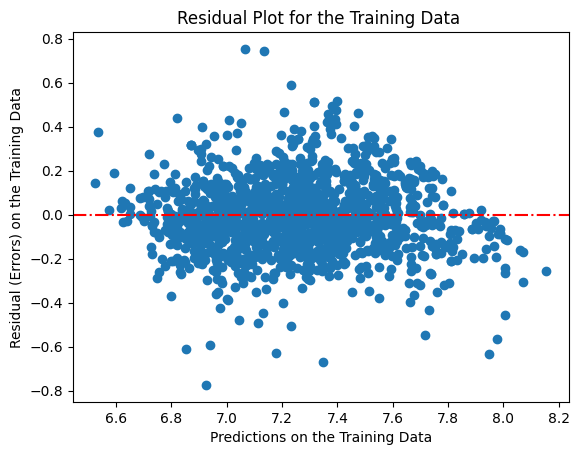

In [186]:
# Creating a scatter plot to check the Variance in the data from the residuals
plt.scatter(predictions, residuals)
plt.axhline(y=0, color="r", linestyle="-.")
plt.xlabel("Predictions on the Training Data")
plt.ylabel("Residual (Errors) on the Training Data")
plt.title("Residual Plot for the Training Data ")

From the residual plot helps us to determine residual (errors) on the y axis and the predicated on the x axis. A good model will always show residuals randomly scattered around horizontal line (x = 0) without showing any specific pattern

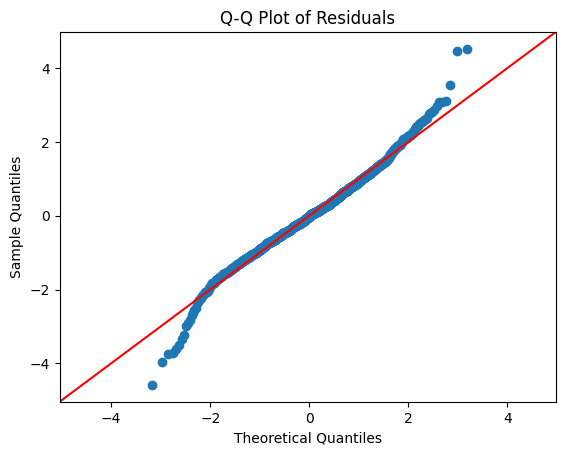

In [187]:
# statsmodel provide a qqplot function 
sm.qqplot(residuals, line="45", fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

From the q-q plot we can determine if the given dataset is normally distributed or not. If the points in the q-q plot lies close to the line x = y then we can say that the dataset is normally distributed.

# MODEL SELECTION

For the model, I have selected XG Boosting and Have instantiated the instance usingXGBRegressor() class I have to choose a model which are robust to outliers and heteroscedasticity. I have called the fit() function to train the model on the XGBRegressor by passing the training features and training labels. The model will learn the patterns and relationships among the training data.

In [188]:
model = XGBRegressor(objective='reg:squarederror', learning_rate=0.1, n_estimators=100, max_depth=3, random_state=5310)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=5310, ...)

# MODEL EVALUATION

To Evaluate the model how well the model is performing. I have made prediction on the testing data first. Then I used the agreed upon evalution metric Root mean sqaured error and Adjusted R squared to evaluate the model's performance 

In [189]:
# Predictions on the Test Data
preds = model.predict(X_test)

Model performance is measured using MSLE. While MSLE employs a similar methodology as MSE, it treats large outliers in the dataset on the same scale and offsets them using logarithms. The average of the squared variations between the logarithms of the actual and predicted values is then used to determine the prediction model's loss.

In [190]:
# Calculate Mean Squared Error and Adjusted R-squared
print("Mean Squared Logarithmic Error on testing dataset: ", mean_squared_error(y_test, preds))


Mean Squared Logarithmic Error on testing dataset:  0.021195417590319093


In [191]:
def adj_r2_score(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1-r2) * (len(y_true)-1) / (len(y_true)-X_train.shape[1]-1)
    return adj_r2

Adjusted R squared is a statistic that shows us how much of the target variable's variation is explained by the characteristics in our dataset, corrected for degrees of freedom. It is a better measure than r squared because as we add additional characteristics to our model, the value of r squared always increases, whereas Adjusted R squared penalises the addition of irrelevant features.

In [192]:
print("The Adjusted R squared value on testing data: ", adj_r2_score(y_test, preds))

The Adjusted R squared value on testing data:  0.7620482309040966


In [193]:
model.intercept_

array([7.251976], dtype=float32)

Evaluating the model on the training dataset

In [194]:
train_predicts = model.predict(X_train)
print("Mean Square Logrithmic Error on training dataset: ", mean_squared_error(y_train, train_predicts))
print("Adjusted R-squared on training dataset: ", adj_r2_score(y_train, train_predicts))

Mean Square Logrithmic Error on training dataset:  0.015734374678864002
Adjusted R-squared on training dataset:  0.8504799651061488


This implies that the model performance on the training dataset is well, This is clearly a case of overfitting where the model has learned the relationships from the dataset. The model is memorizing the training data too well and failing to capture the underlying patterns that generalize to new data and the model is unable to find the global minima. Therefore, we need to do hyperparameter tuning to get the better performance.

# HYPER PARAMETER TUNING 

For hyperparameter tuning, I employed RandomizedSearchCV, which blends cross-validation and randomised search. It operates by using a dataset, a base model (such as XGBRegressor), and a parameter grid with various hyperparameter values. RandomizedSearchCV employs integrated cross-validation rather than requiring distinct training and validation sets. The dataset is divided into k folds, and the model is trained and tested k times. The validation set is used once for each fold, and the remaining folds are used for training.

The model is assessed using a predetermined metric (such as accuracy or RMSE) after being trained for a random selection of hyperparameter combinations across all cross-validation folds. Each combination is tested, and the model with the best average performance over k folds is selected. The hyperparameters that yield optimal results

In [195]:
# defining a parameter grid

param_grid = {
    'n_estimators': [200, 400, 600],  
    'max_depth': [4, 6, 8, 10, 12], 
    'learning_rate': [0.01, 0.05, 0.1],  
    'subsample': [0.6, 0.7, 0.8, 0.9],  
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],  
    'colsample_bylevel': [0.6, 0.7, 0.8],  
    'gamma': [0, 0.1, 0.2, 0.3],  
    'min_child_weight': [4, 5, 6],  
    'reg_alpha': [0.01, 0.05, 0.1],  
    'reg_lambda': [0.5, 1, 1.5, 2],  
}


In [196]:
# Instantiating a Randomized Search object
random_search = RandomizedSearchCV(estimator=XGBRegressor(random_state=42), param_distributions = param_grid, scoring='r2', cv=5, verbose=2, n_jobs=-1,)


In [197]:
# Fitting on full training data
random_search.fit(X_train_full, y_train_full)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bylevel': [0.6, 0.7, 0.8],
                                        'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [4, 6, 8, 10, 12],
                                        'min_child_weight': [4, 5, 6],
                                        'n_estimators': [200, 400, 600],
                                        'reg_alpha': [0.01, 0.05, 0.1],
                                        'reg_lambda': [0.5, 1, 1.5, 2],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   scoring='r2', verbose=2)

In [198]:
# best model from RandomizedSearchSV
best_model = random_search.best_estimator_

# Hyperparameters of the best model
best_params = random_search.best_params_

# R squared score of best model
best_score = random_search.best_score_

# Printing the best model stats
print("Best Model: ", best_model)
print("Best Hyperparameters: ", best_params)
print("Best Score: ", best_score)

Best Model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=None, colsample_bytree=0.7,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Best Hyperparameters:  {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.01, 'n_estimators': 600, 'min_child_weight': 4, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8}
Best Score:  0.8127109954524416


In [199]:
# Evaluate the model performance on test and train datasets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# R-squared and Mean Squared Error
print("R-squared on Train dataset: ", r2_score(y_train, y_train_pred))
print("R-squared on Test dataset: ", r2_score(y_test, y_test_pred))

print("Mean Squared Logarithmic Error on Train dataset: ", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Logarithmic Error on Test dataset: ", mean_squared_error(y_test, y_test_pred))

R-squared on Train dataset:  0.996519395572213
R-squared on Test dataset:  0.8113349165436328
Mean Squared Logarithmic Error on Train dataset:  0.00037870295772314376
Mean Squared Logarithmic Error on Test dataset:  0.01877459767957268


In [200]:
# Creating and fitting the XGBRegressor model with best hyperparameters found from RandomizedSearchCV
b_model = XGBRegressor(**best_params)
b_model.fit(X_train_full, y_train_full)
preds = b_model.predict(X_test)

In [201]:
# Evaluating the model
print("Mean Squared Logarithmic Error on Testing Data: ", mean_squared_error(y_test, preds))
print("Adjusted R squared on Testing Data : ", adj_r2_score(y_test, preds))

Mean Squared Logarithmic Error on Testing Data:  0.01913117489459332
Adjusted R squared on Testing Data :  0.7852225891915969


In [202]:
preds = b_model.predict(X_train)  
print("Mean Square Logrithmic Error on training dataset: ", mean_squared_error(y_train, preds))
print("Adjusted R-squared on training dataset: ", adj_r2_score(y_train, preds))

Mean Square Logrithmic Error on training dataset:  0.00034067608184309555
Adjusted R-squared on training dataset:  0.9967626359048698


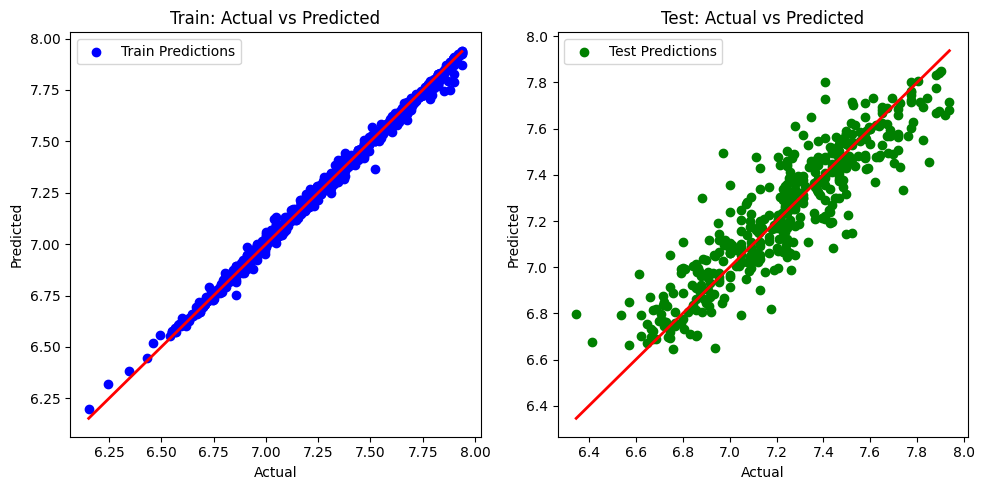

In [203]:
# Plotting the predictions for both training and testing datasets
plt.figure(figsize=(10,5))

# Training data predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color="blue", label="Train Predictions")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linewidth=2)
plt.title("Train: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# Testing data predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color="green", label="Test Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)
plt.title("Test: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

plt.tight_layout()
plt.show()


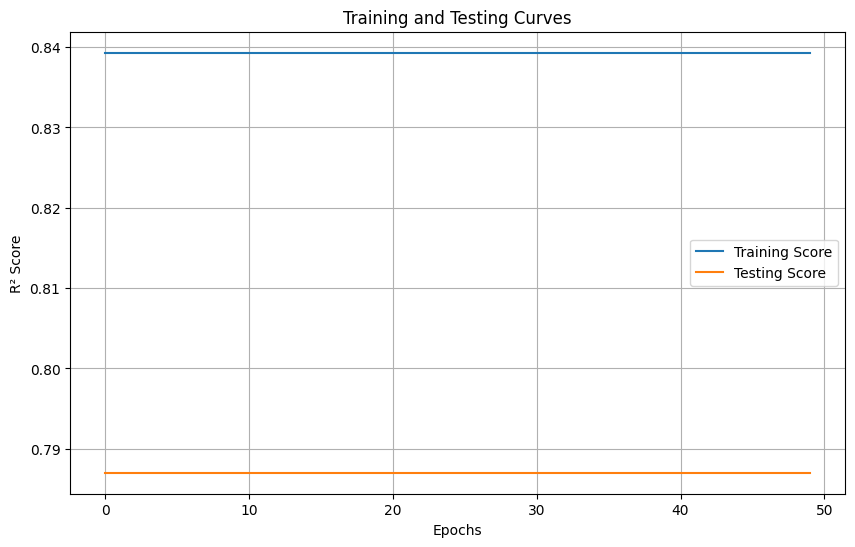

In [204]:
# Creating the list to store the training and testing scores
training_scores = []
testing_scores = []


# Number of iteration the function will run for to get the training and testing scores
epochs = 50

for _ in range(epochs):
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train_full, y_train_full)
    y_train_pred = model.predict(X_train_full)
    y_test_pred = model.predict(X_test)
    training_scores.append(r2_score(y_train_full, y_train_pred))
    testing_scores.append(r2_score(y_test, y_test_pred))

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(training_scores, label='Training Score')
plt.plot(testing_scores, label='Testing Score')
plt.title('Training and Testing Curves')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x800 with 0 Axes>

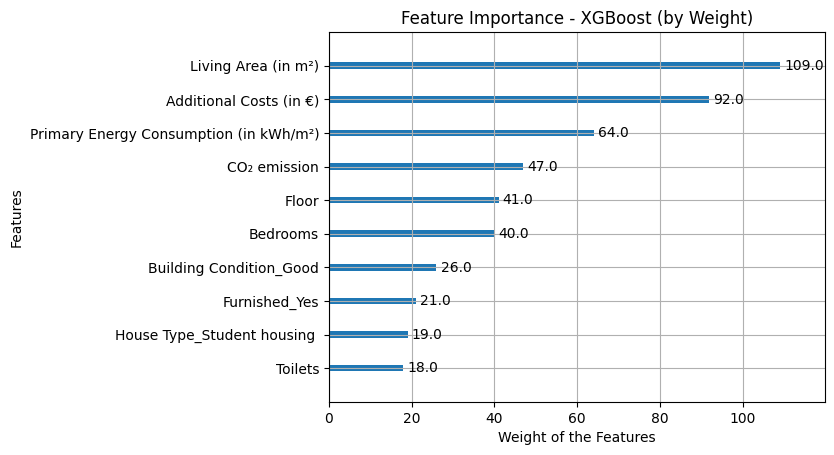

In [205]:

plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', max_num_features=10)  

plt.title('Feature Importance - XGBoost (by Weight)')
plt.xlabel('Weight of the Features')
plt.ylabel('Features')
plt.show()

## INDIVIDUAL COMPONENT 2: araj0648

In [206]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import statsmodels.api as sm

In [207]:
data = pd.read_csv('CleanedData.csv')

In [208]:
data.drop(['Unnamed: 0','Tenement','Rent (in €)','Additional Costs (in €)'],inplace=True, axis=1)

In [209]:
data.columns

Index(['Floor', 'Kitchen', 'Bedrooms', 'Bathrooms', 'Toilets',
       'Primary Energy Consumption (in kWh/m²)', 'Energy Class',
       'CO₂ emission', 'Heating Type', 'Double Glazing', 'House Type',
       'Living Area (in m²)', 'Furnished', 'Building Condition', 'Elevator',
       'Total Rent (in €)'],
      dtype='object')

In [210]:
data.head(5)

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
0,3,Installed,2,1,1,234,Not specified,49,Gas,No,Apartment,90,No,As new,Unknown,1350
1,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,Apartment,90,Unknown,Good,No,1280
2,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,Apartment,70,Yes,As new,Yes,1040
3,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,Apartment,50,Yes,Just renovated,No,1200
4,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,Apartment,60,Yes,Just renovated,No,1450


In [211]:
data.reset_index()

,index,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
0,0,3,Installed,2,1,1,234,Not specified,49,Gas,No,Apartment,90,No,As new,Unknown,1350
1,1,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,Apartment,90,Unknown,Good,No,1280
2,2,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,Apartment,70,Yes,As new,Yes,1040
3,3,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,Apartment,50,Yes,Just renovated,No,1200
4,4,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,Apartment,60,Yes,Just renovated,No,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2141,4,USA hyper equipped,1,1,1,147,C,29,Gas,Yes,Apartment,67,Unknown,As new,Yes,2646
2142,2142,5,Hyper equipped,2,1,1,169,Not specified,37,Gas,Yes,Apartment,110,No,As new,Yes,2155
2143,2143,1,USA hyper equipped,2,1,1,88,B,46,Gas,Yes,Apartment,90,No,As new,Unknown,1200
2144,2144,1,USA hyper equipped,2,1,1,88,B,46,Gas,Yes,Apartment,90,No,As new,Unknown,1200


In [212]:
data=data.drop(12)

In [213]:
data

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
0,3,Installed,2,1,1,234,Not specified,49,Gas,No,Apartment,90,No,As new,Unknown,1350
1,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,Apartment,90,Unknown,Good,No,1280
2,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,Apartment,70,Yes,As new,Yes,1040
3,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,Apartment,50,Yes,Just renovated,No,1200
4,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,Apartment,60,Yes,Just renovated,No,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,4,USA hyper equipped,1,1,1,147,C,29,Gas,Yes,Apartment,67,Unknown,As new,Yes,2646
2142,5,Hyper equipped,2,1,1,169,Not specified,37,Gas,Yes,Apartment,110,No,As new,Yes,2155
2143,1,USA hyper equipped,2,1,1,88,B,46,Gas,Yes,Apartment,90,No,As new,Unknown,1200
2144,1,USA hyper equipped,2,1,1,88,B,46,Gas,Yes,Apartment,90,No,As new,Unknown,1200


In [214]:
encode=data[['Kitchen','Energy Class','Heating Type','House Type','Furnished','Building Condition','Double Glazing','Elevator']]

In [215]:
numeric=data[['Floor','Bedrooms','Bathrooms','Toilets','Primary Energy Consumption (in kWh/m²)','CO₂ emission','Living Area (in m²)']]

In [216]:
numeric.head()

,Floor,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),CO₂ emission,Living Area (in m²)
0,3,2,1,1,234,49,90
1,3,2,1,1,242,52,90
2,4,1,1,1,412,76,70
3,2,1,1,1,206,50,50
4,3,2,1,1,247,63,60


In [217]:
dummy_encode=pd.get_dummies(encode,dtype=int)

In [218]:
dummy_encode

,Kitchen_Hyper equipped,Kitchen_Installed,Kitchen_Not installed,Kitchen_Semi equipped,Kitchen_USA hyper equipped,Kitchen_USA installed,Kitchen_USA semi equipped,Kitchen_USA uninstalled,Energy Class_A,Energy Class_B,...,Building Condition_Good,Building Condition_Just renovated,Building Condition_To be done up,Building Condition_To renovate,Building Condition_To restore,Double Glazing_No,Double Glazing_Yes,Elevator_No,Elevator_Unknown,Elevator_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2142,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2143,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2144,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [219]:
numeric

,Floor,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),CO₂ emission,Living Area (in m²)
0,3,2,1,1,234,49,90
1,3,2,1,1,242,52,90
2,4,1,1,1,412,76,70
3,2,1,1,1,206,50,50
4,3,2,1,1,247,63,60
...,...,...,...,...,...,...,...
2141,4,1,1,1,147,29,67
2142,5,2,1,1,169,37,110
2143,1,2,1,1,88,46,90
2144,1,2,1,1,88,46,90


In [220]:
for i in data.columns:
    print('=======================================================')
    print(data[i].unique())
    print(data[i].value_counts())
    print('=======================================================\n\n\n')

[3 4 2 0 1 6 5]
Floor
1    482
2    444
0    418
3    375
4    215
5    118
6     93
Name: count, dtype: int64



['Installed' 'USA hyper equipped' 'Hyper equipped' 'Not installed'
 'Semi equipped' 'USA semi equipped' 'USA installed' 'USA uninstalled']
Kitchen
Hyper equipped        950
USA hyper equipped    501
Installed             441
USA installed         119
Semi equipped          77
USA semi equipped      29
Not installed          22
USA uninstalled         6
Name: count, dtype: int64



[2 1 3 4 5]
Bedrooms
2    953
1    762
3    375
4     47
5      8
Name: count, dtype: int64



[1 2 4 3]
Bathrooms
1    1718
2     407
3      18
4       2
Name: count, dtype: int64



[ 1  2  3  4  5 12  6]
Toilets
1     1443
2      606
3       89
4        4
5        1
12       1
6        1
Name: count, dtype: int64



[234 242 412 206 247  86 252 407 245 227 277 165 214 411 197 101 251 404
 117 154 112 149 203 224 208 114 336 263 126  47 250 281  79  83 240 291
 159 272 138 233 200 179 221 201 16

In [221]:
for_tree=data

In [222]:
for_tree['Energy Class'] = for_tree['Energy Class'].replace('Not specified',0)
for_tree['Energy Class'] = for_tree['Energy Class'].replace('A',0)
for_tree['Energy Class'] = for_tree['Energy Class'].replace('B',1)
for_tree['Energy Class'] = for_tree['Energy Class'].replace('C',2)
for_tree['Energy Class'] = for_tree['Energy Class'].replace('D',3)
for_tree['Energy Class'] = for_tree['Energy Class'].replace('E',4)
for_tree['Energy Class'] = for_tree['Energy Class'].replace('F',5)
for_tree['Energy Class'] = for_tree['Energy Class'].replace('G',6)

C:\Users\Junaid\AppData\Local\Temp\ipykernel_13136\1215845140.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for_tree['Energy Class'] = for_tree['Energy Class'].replace('G',6)


In [223]:
data.columns

Index(['Floor', 'Kitchen', 'Bedrooms', 'Bathrooms', 'Toilets',
       'Primary Energy Consumption (in kWh/m²)', 'Energy Class',
       'CO₂ emission', 'Heating Type', 'Double Glazing', 'House Type',
       'Living Area (in m²)', 'Furnished', 'Building Condition', 'Elevator',
       'Total Rent (in €)'],
      dtype='object')

In [224]:
data['Energy Class'].unique()

array([0, 4, 1, 6, 3, 2, 5])

In [225]:
data[['Double Glazing', 'Elevator', 'Furnished', 'Building Condition', 
           'Kitchen', 'Heating Type', 'House Type', 'Energy Class',
           'Primary Energy Consumption (in kWh/m²)', 'CO₂ emission', 'Living Area (in m²)']]

,Double Glazing,Elevator,Furnished,Building Condition,Kitchen,Heating Type,House Type,Energy Class,Primary Energy Consumption (in kWh/m²),CO₂ emission,Living Area (in m²)
0,No,Unknown,No,As new,Installed,Gas,Apartment,0,234,49,90
1,Yes,No,Unknown,Good,USA hyper equipped,Gas,Apartment,4,242,52,90
2,No,Yes,Yes,As new,Hyper equipped,Gas,Apartment,0,412,76,70
3,Yes,No,Yes,Just renovated,Hyper equipped,Gas,Apartment,0,206,50,50
4,Yes,No,Yes,Just renovated,Hyper equipped,Gas,Apartment,0,247,63,60
...,...,...,...,...,...,...,...,...,...,...,...
2141,Yes,Yes,Unknown,As new,USA hyper equipped,Gas,Apartment,2,147,29,67
2142,Yes,Yes,No,As new,Hyper equipped,Gas,Apartment,0,169,37,110
2143,Yes,Unknown,No,As new,USA hyper equipped,Gas,Apartment,1,88,46,90
2144,Yes,Unknown,No,As new,USA hyper equipped,Gas,Apartment,1,88,46,90


In [226]:
dummy_encode=dummy_encode.reset_index()

In [227]:
numeric=numeric.reset_index()

In [228]:
test=pd.merge(dummy_encode,numeric,on='index')

In [229]:
test.drop('index',axis=1,inplace=True)

In [230]:
numeric.drop('index',axis=1,inplace=True)

In [231]:
dummy_encode.drop('index',axis=1,inplace=True)

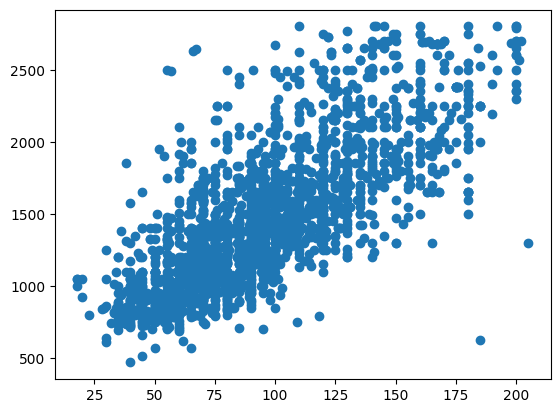

In [232]:
plt.scatter(data['Living Area (in m²)'],data['Total Rent (in €)'])

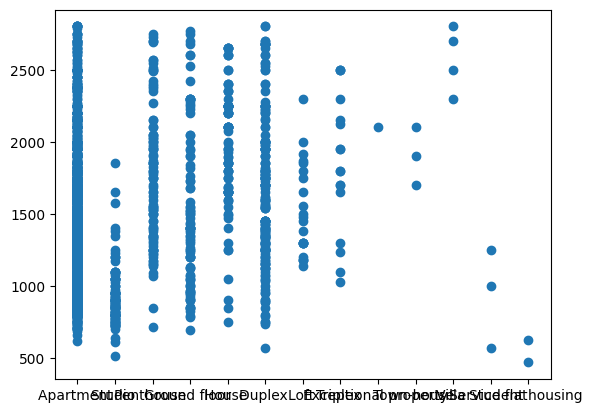

In [233]:
plt.scatter(data['House Type'],data['Total Rent (in €)'])

In [234]:
data

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
0,3,Installed,2,1,1,234,0,49,Gas,No,Apartment,90,No,As new,Unknown,1350
1,3,USA hyper equipped,2,1,1,242,4,52,Gas,Yes,Apartment,90,Unknown,Good,No,1280
2,4,Hyper equipped,1,1,1,412,0,76,Gas,No,Apartment,70,Yes,As new,Yes,1040
3,2,Hyper equipped,1,1,1,206,0,50,Gas,Yes,Apartment,50,Yes,Just renovated,No,1200
4,3,Hyper equipped,2,1,1,247,0,63,Gas,Yes,Apartment,60,Yes,Just renovated,No,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,4,USA hyper equipped,1,1,1,147,2,29,Gas,Yes,Apartment,67,Unknown,As new,Yes,2646
2142,5,Hyper equipped,2,1,1,169,0,37,Gas,Yes,Apartment,110,No,As new,Yes,2155
2143,1,USA hyper equipped,2,1,1,88,1,46,Gas,Yes,Apartment,90,No,As new,Unknown,1200
2144,1,USA hyper equipped,2,1,1,88,1,46,Gas,Yes,Apartment,90,No,As new,Unknown,1200


In [235]:
combo=data[['Floor','Living Area (in m²)','Bedrooms', 'Bathrooms','Toilets','Energy Class','CO₂ emission']]

In [236]:
combo.columns

Index(['Floor', 'Living Area (in m²)', 'Bedrooms', 'Bathrooms', 'Toilets',
       'Energy Class', 'CO₂ emission'],
      dtype='object')

In [237]:
combo['Energy Class'].unique()

array([0, 4, 1, 6, 3, 2, 5])

In [238]:
combo['Energy Class'] = combo['Energy Class'].replace('Not specified',0)
combo['Energy Class'] = combo['Energy Class'].replace('A',0)
combo['Energy Class'] = combo['Energy Class'].replace('B',1)
combo['Energy Class'] = combo['Energy Class'].replace('C',2)
combo['Energy Class'] = combo['Energy Class'].replace('D',3)
combo['Energy Class'] = combo['Energy Class'].replace('E',4)
combo['Energy Class'] = combo['Energy Class'].replace('F',5)
combo['Energy Class'] = combo['Energy Class'].replace('G',6)

C:\Users\Junaid\AppData\Local\Temp\ipykernel_13136\1597412324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo['Energy Class'] = combo['Energy Class'].replace('Not specified',0)
C:\Users\Junaid\AppData\Local\Temp\ipykernel_13136\1597412324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo['Energy Class'] = combo['Energy Class'].replace('A',0)
C:\Users\Junaid\AppData\Local\Temp\ipykernel_13136\1597412324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Training and testing

In [239]:
X=numeric
y = data['Total Rent (in €)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split into training and testing sets


model = DecisionTreeRegressor(random_state=42) 
model.fit(X_train, y_train) 


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#plt.figure(figsize=(15, 10))
#tree.plot_tree(model, feature_names=X.columns, filled=True)
#plt.show()

Mean Squared Error: 136303.6666019166
R-squared: 0.3678627152287227


In [240]:
X1=test
y1 = data['Total Rent (in €)']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42) # Split into training and testing sets


model = DecisionTreeRegressor(random_state=42) 
model.fit(X_train, y_train) 


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# plt.figure(figsize=(15, 10))
# tree.plot_tree(model, feature_names=X.columns, filled=True)
# plt.show()



# plt.figure(figsize=(8,6))
# sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
# plt.xlabel('Total Rent')
# plt.ylabel('Test')
# plt.title('Residual Plot for Decision Tree')
# plt.show()

Mean Squared Error: 109745.00932400933
R-squared: 0.49103414500294684


#Linear Regression

In [241]:
X = dummy_encode
y = data['Total Rent (in €)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

model.score(X_test, y_test)




Mean Squared Error: 158873.5064102564
Mean Absolute Error: 310.1060606060606
R-squared: 0.2631902760357627


0.2631902760357627

In [242]:
X = numeric
y = data['Total Rent (in €)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

model.score(X_test, y_test)


Mean Squared Error: 77605.82525170533
Mean Absolute Error: 215.26443657995839
R-squared: 0.6400864563656762


0.6400864563656762


Mean Squared Error: 0.027134909386888808
Mean Absolute Error: 0.12758496059585517
R-squared: 0.7274815471877063






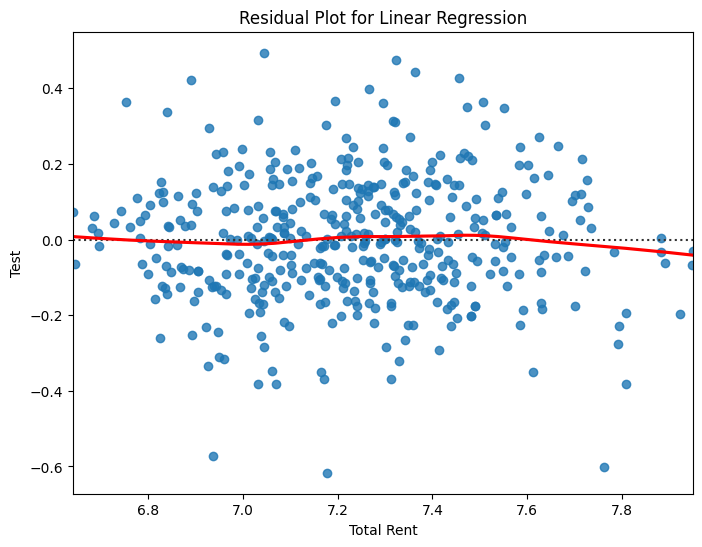

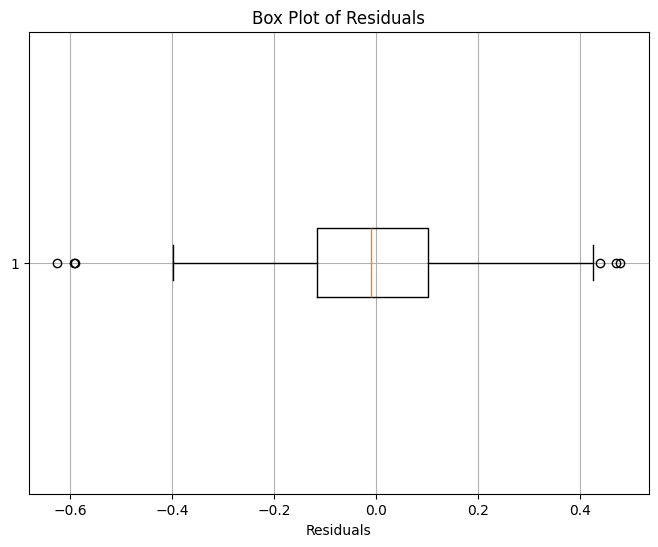

In [243]:
X = test
y = data['Total Rent (in €)']
y=np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('================================================\n')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print('================================================\n\n\n\n')


residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Total Rent')
plt.ylabel('Test')
plt.title('Residual Plot for Linear Regression')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(residuals, vert=False)
plt.title('Box Plot of Residuals')
plt.xlabel('Residuals')
plt.grid()
plt.show()

In [244]:
#Testing with 'Floor', 'Living Area (in m²)', 'Bedrooms', 'Bathrooms', 'Toilets','Energy Class', 'CO₂ emission'
X = combo
y = data['Total Rent (in €)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

print(f'R-squared: {r2}')

Mean Squared Error: 77682.69560370469
Mean Absolute Error: 215.1641557090272
R-squared: 0.6397299537358958


Hyper tuning for Linear regression

In [245]:
X = test
y = data['Total Rent (in €)']
y=np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


param_grid_ridge = {'alpha': [0.01, 0.1, 1.0]}
model_ridge = Ridge()
grid_search_ridge = GridSearchCV(model_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_model_ridge = grid_search_ridge.best_estimator_


y_pred = best_model_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('================================================')
print(f'Ridge Regression - Mean Squared Error: {mse}')
print(f'Ridge Regression - Mean Absolute Error: {mae}')
print(f'Ridge Regression - R-squared: {r2}')
print('================================================\n')





param_grid_lasso = {'alpha': [0.01, 0.1, 1.0]}
model_lasso = Lasso()
grid_search_lasso = GridSearchCV(model_lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_model_lasso = grid_search_lasso.best_estimator_


y_pred = best_model_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('================================================')
print(f'Lasso Regression - Mean Squared Error: {mse}')
print(f'Lasso Regression - Mean Absolute Error: {mae}')
print(f'Lasso Regression - R-squared: {r2}')
print('================================================\n')







param_grid_elastic = {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]} # Example values
model_elastic = ElasticNet()
grid_search_elastic = GridSearchCV(model_elastic, param_grid_elastic, cv=5, scoring='neg_mean_squared_error')
grid_search_elastic.fit(X_train, y_train)
best_model_elastic = grid_search_elastic.best_estimator_




y_pred = best_model_elastic.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('================================================')
print(f'Elastic Regression - Mean Squared Error: {mse}')
print(f'Elastic Regression - Mean Absolute Error: {mae}')
print(f'Elastic Regression - R-squared: {r2}')
print('================================================')

Ridge Regression - Mean Squared Error: 0.027073060887468105
Ridge Regression - Mean Absolute Error: 0.12747064686979337
Ridge Regression - R-squared: 0.7281026974974631

Lasso Regression - Mean Squared Error: 0.03220942077976546
Lasso Regression - Mean Absolute Error: 0.1420213613298253
Lasso Regression - R-squared: 0.6765177509263007

Elastic Regression - Mean Squared Error: 0.028643851791586333
Elastic Regression - Mean Absolute Error: 0.13314589054279782
Elastic Regression - R-squared: 0.7123270963786785


## INDIVIDUAL COMPONENT 3: sshi0487

In [247]:
#Import all the libraries
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [251]:
#Importing the dataset file 
df = pd.read_csv('CleanedData.csv')

# CHECKING THE DETAILS OF DATASET

In [252]:
df.head(5)

,Unnamed: 0,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,Rent (in €),Additional Costs (in €),Tenement,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
0,1,3,Installed,2,1,1,234,Not specified,49,Gas,No,1150,200.0,No,Apartment,90,No,As new,Unknown,1350
1,2,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,1200,80.0,No,Apartment,90,Unknown,Good,No,1280
2,4,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,960,80.0,No,Apartment,70,Yes,As new,Yes,1040
3,6,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,1050,150.0,No,Apartment,50,Yes,Just renovated,No,1200
4,7,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,1250,200.0,No,Apartment,60,Yes,Just renovated,No,1450


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              2146 non-null   int64  
 1   Floor                                   2146 non-null   int64  
 2   Kitchen                                 2146 non-null   object 
 3   Bedrooms                                2146 non-null   int64  
 4   Bathrooms                               2146 non-null   int64  
 5   Toilets                                 2146 non-null   int64  
 6   Primary Energy Consumption (in kWh/m²)  2146 non-null   int64  
 7   Energy Class                            2146 non-null   object 
 8   CO₂ emission                            2146 non-null   int64  
 9   Heating Type                            2146 non-null   object 
 10  Double Glazing                          2146 non-null   obje

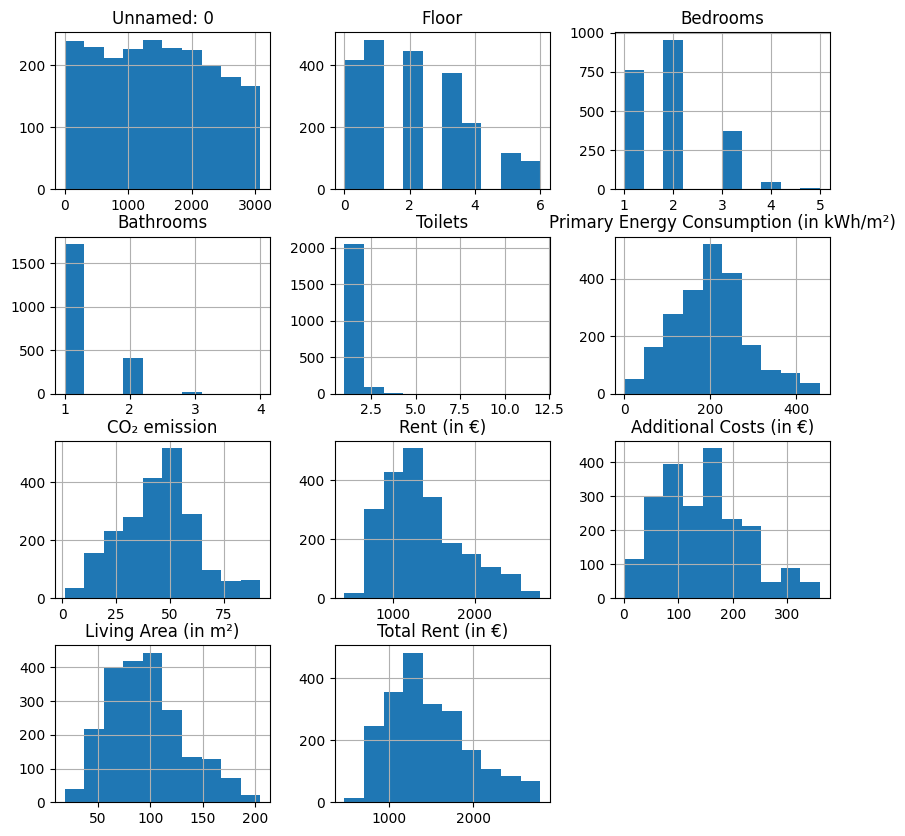

In [254]:
# Histograms plotting for knowing the insights of the data like how is the distribution of data.
df.hist(figsize=(10, 10))
plt.show()

# DATA PRE PROCESSING 

In [255]:
# Drop the Additional Costs because the Total rent is Additional Cost + Rent
df.drop('Additional Costs (in €)', axis=1, inplace=True)

In [256]:
# Drop the Rent the Total rent is Additional Cost + Rent
df.drop('Rent (in €)', axis=1, inplace=True)

In [257]:
# Drop the Tenment as it only has No values for all rows and Unamed column as it is of no use.
df.drop('Unnamed: 0', axis=1, inplace=True)

In [258]:
# Drop the Tenment as it only has No values for all rows and Unamed column as it is of no use.
df.drop('Tenement', axis=1, inplace=True)

#We have Energy Class in category, the Categories are from A to F and Not Specified. So we will use Label Encoding to convert categorical columns into numerical ones so that they can be fitted by machine learning models.

In [259]:
df['Energy Class'].value_counts()

Energy Class
Not specified    676
D                390
C                345
E                272
B                169
F                165
G                 74
A                 55
Name: count, dtype: int64

In [260]:
# Applyting One Hot Encoding on Energy Class
ohe = OneHotEncoder(handle_unknown='ignore') 
energy_class_encoded = ohe.fit_transform(df[['Energy Class']]).toarray() 
energy_class_labels = np.array(ohe.categories_).ravel() 
energy_class_features = pd.DataFrame(energy_class_encoded, columns=energy_class_labels)
df = pd.concat([df, energy_class_features], axis=1)

df.drop('Energy Class', axis=1, inplace=True) 

#Now we have another column which has Heating Type as 5 categories. So, we will use this technique to represent categorical varaibles values in machine learning model.

In [261]:
df['Heating Type'].value_counts()

Heating Type
Gas         2033
Fuel oil      57
Electric      54
Pellet         1
Carbon         1
Name: count, dtype: int64

In [262]:
# Applyting OneHot Encoding on Heating Type
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[['Heating Type']]).toarray()
feature_labels = np.array(ohe.categories_).ravel()
features = pd.DataFrame(feature_array, columns=feature_labels)
df = pd.concat([df, features], axis=1)
df.drop('Heating Type', axis=1, inplace=True)

In [263]:
# Applying Encoding on House Type
count_map = df['House Type'].value_counts()
df['House Type_Count'] = df['House Type'].map(count_map)
df.drop('House Type', axis=1, inplace=True)

In [264]:
# Applying feature encoding for House Type
furnished_map = {'Yes': 1, 'No': 0, 'Unknown': 0} 
df['Furnished_Encoded'] = df['Furnished'].map(furnished_map)
df.drop('Furnished', axis=1, inplace=True)

In [265]:
# Mapping for Double Glazing
double_glazing_map = {'Yes': 1, 'No': 0}
df['Double Glazing_Encoded'] = df['Double Glazing'].map(double_glazing_map)
df.drop('Double Glazing', axis=1, inplace=True)

In [266]:
#Applying One Hot Encoding for Building Condition
ohe = OneHotEncoder(handle_unknown='ignore') 
building_condition_encoded = ohe.fit_transform(df[['Building Condition']]).toarray()
building_condition_labels = np.array(ohe.categories_).ravel()
building_condition_features = pd.DataFrame(building_condition_encoded,   columns=building_condition_labels)

df = pd.concat([df, building_condition_features], axis=1)
df.drop('Building Condition', axis=1, inplace=True)

In [267]:
# Mapping for kitchen
kitchen_map = {'Installed': 1, 'USA installed': 1, 'Hyper equipped': 0, 'USA hyper equipped': 0, 'Semi equipped': 0, 'USA semi equipped': 0} 
df['Kitchen_Encoded'] = df['Kitchen'].map(kitchen_map).fillna(0) 
df.drop('Kitchen', axis=1, inplace=True)

In [268]:
# Mapping for Elevator
elevator_map = {'Yes': 1, 'No': 0, 'Unknown': 0} 
df['Elevator_Encoded'] = df['Elevator'].map(elevator_map)
df.drop('Elevator', axis=1, inplace=True)

In [269]:
pd. set_option('display.max_columns', None)
df.head(5)

,Floor,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),CO₂ emission,Living Area (in m²),Total Rent (in €),A,B,C,D,E,F,G,Not specified,Carbon,Electric,Fuel oil,Gas,Pellet,House Type_Count,Furnished_Encoded,Double Glazing_Encoded,As new,Good,Just renovated,To be done up,To renovate,To restore,Kitchen_Encoded,Elevator_Encoded
0,3,2,1,1,234,49,90,1350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1533,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,3,2,1,1,242,52,90,1280,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1533,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,4,1,1,1,412,76,70,1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1533,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2,1,1,1,206,50,50,1200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1533,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,3,2,1,1,247,63,60,1450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1533,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


# NOW WE HAVE ALL DATA IN NUMERIC FORMAT

In [270]:
#Defining Target Variable
target_variable = 'Total Rent (in €)' 

In [271]:
#Feature Scaling on the numerical columns using StandardScaler
numerical_features = ['Living Area (in m²)', 'Bedrooms', 'Living Area (in m²)', 'CO₂ emission','Primary Energy Consumption (in kWh/m²)', 'House Type_Count']  
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [272]:
# Split Data into Training and Testing Sets. Here I have provided Training Data as 67% and Testing Data as 33%.
X = df.drop(target_variable, axis=1) 
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [273]:
# Function to calculate adjusted R-squared
def adj_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [274]:
# we print all the values i.e actual values amd predicted values for a modal
#calculate MSE, R sqaure and Adjusted R sqaure
def print_evaluation(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2_value = adj_r2(r2, len(y_true), X_train.shape[1])
    print(f"{model_name} - MSE: {mse:.2f}, R-squared: {r2:.2f}, Adj R-squared: {adj_r2_value:.2f}")

In [275]:
# Train a Gradient Boosting Regression Model
model_gb = GradientBoostingRegressor(random_state=42) 
model_gb.fit(X_train, y_train)

y_pred_train_gb = model_gb.predict(X_train)
y_pred_test_gb = model_gb.predict(X_test)

print_evaluation(y_train, y_pred_train_gb, "Gradient Boosting (Train)")
print_evaluation(y_test, y_pred_test_gb, "Gradient Boosting (Test)")

Gradient Boosting (Train) - MSE: 47792.66, R-squared: 0.80, Adj R-squared: 0.79
Gradient Boosting (Test) - MSE: 65912.52, R-squared: 0.72, Adj R-squared: 0.70


In [276]:
#Performing hyperparameter tunning for Gradient Boosting Regresssor model using Grid Search Cross-Validation
param_grid = {
'n_estimators': [50, 100, 150],
'learning_rate': [0.01, 0.05, 0.1],
'max_depth': [2, 3, 4],
'min_samples_split': [4, 6, 8],
'min_samples_leaf': [2, 3, 4]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid,
cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"\nBest Hyperparameters for Gradient Boosting: {grid_search.best_params_}")

best_gb_model = grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)
print(f"Best Gradient Boosting - MSE: {mse_best_gb:.2f}, R-squared: {r2_best_gb:.2f}")

C:\Users\Junaid\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
Best Gradient Boosting - MSE: 64295.23, R-squared: 0.72


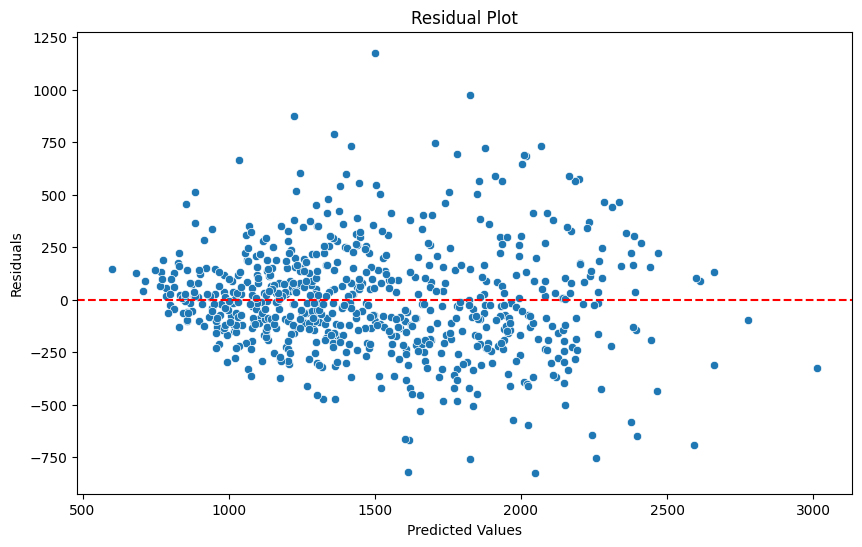

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot
# Compute residuals (difference between actual and predicted values)
residuals = y_test - y_pred_best_gb

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best_gb, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

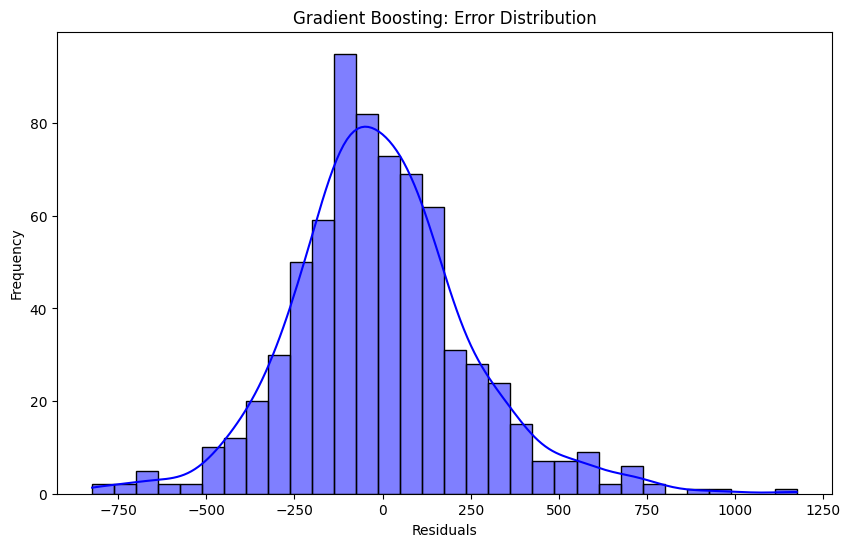

In [278]:
# Error Distribution (Residuals) for Gradient Boosting
residuals_gbr = y_test - y_pred_best_gb
plt.figure(figsize=(10, 6))
sns.histplot(residuals_gbr, kde=True, color='blue')
plt.title('Gradient Boosting: Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

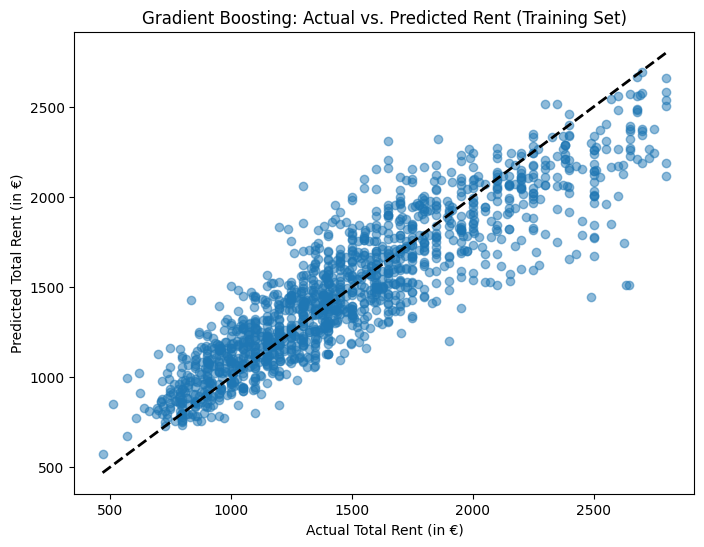

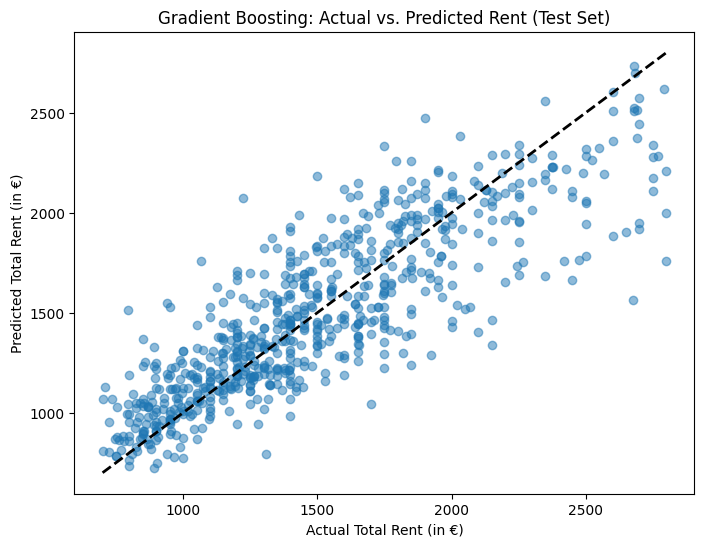

In [279]:
# --- Plot for Training Set ---
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train_gb, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual Total Rent (in €)")
plt.ylabel("Predicted Total Rent (in €)")
plt.title("Gradient Boosting: Actual vs. Predicted Rent (Training Set)")
plt.show()

# --- Plot for Test Set ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Total Rent (in €)")
plt.ylabel("Predicted Total Rent (in €)")
plt.title("Gradient Boosting: Actual vs. Predicted Rent (Test Set)")
plt.show()

# CHECK OTHER PREDICTIVE MODELS TO COMPARE 

In [280]:
#SVR
# Train an SVR Model 
model_svr = SVR(kernel='rbf') 
model_svr.fit(X_train, y_train)

y_pred_train_svr = model_svr.predict(X_train)
y_pred_test_svr = model_svr.predict(X_test)
print_evaluation(y_train, y_pred_train_svr, "SVR (Train)")
print_evaluation(y_test, y_pred_test_svr, "SVR (Test)")

SVR (Train) - MSE: 198096.55, R-squared: 0.16, Adj R-squared: 0.14
SVR (Test) - MSE: 196211.84, R-squared: 0.16, Adj R-squared: 0.12


In [281]:
# Decision Tree 
# Train a Decision Tree Regression Model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)
print_evaluation(y_train, y_pred_train_dt, "Decision Tree (Train)")
print_evaluation(y_test, y_pred_test_dt, "Decision Tree (Test)")

Decision Tree (Train) - MSE: 67.81, R-squared: 1.00, Adj R-squared: 1.00
Decision Tree (Test) - MSE: 134304.58, R-squared: 0.42, Adj R-squared: 0.40


In [282]:
# Train a Random Forest Regression Model
model_rf = RandomForestRegressor(random_state=42, max_depth=7) 
model_rf.fit(X_train, y_train)

y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

print_evaluation(y_train, y_pred_train_rf, "Random Forest (Train)")
print_evaluation(y_test, y_pred_test_rf, "Random Forest (Test)")

Random Forest (Train) - MSE: 37810.26, R-squared: 0.84, Adj R-squared: 0.84
Random Forest (Test) - MSE: 66534.46, R-squared: 0.71, Adj R-squared: 0.70


## GROUP COMPONENT 2

# COMPARISION OF DIFFERNET MODEL USED

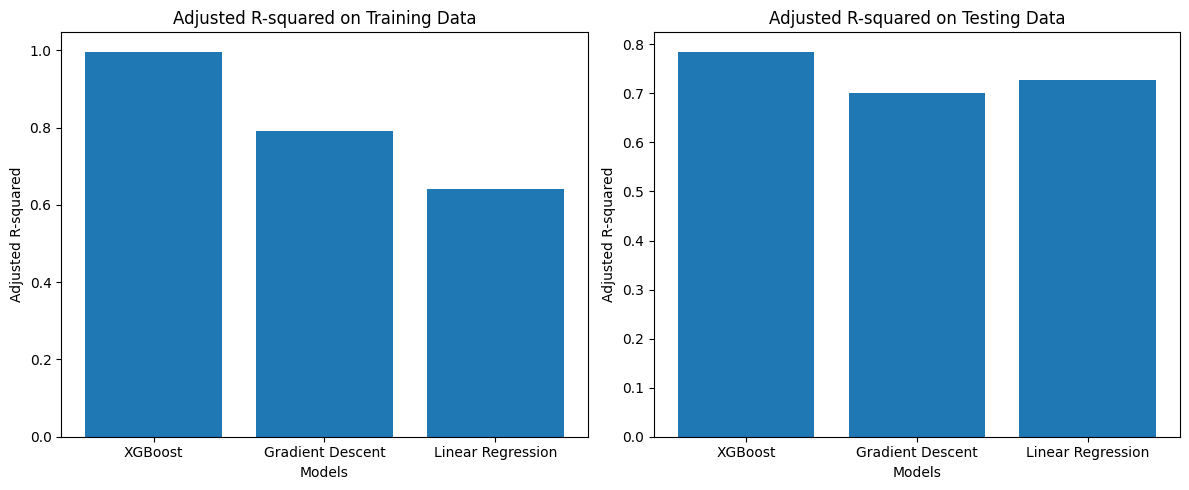

In [289]:
model_used = ['XGBoost', 'Gradient Descent', 'Linear Regression']
training_scores_models = [0.9967626359048698, 0.79, 0.6400864563656762] 
testing_scores_models = [0.7852225891915969, 0.7, 0.7281026974974631]   


fig, axs = plt.subplots(1, 2, figsize=(12, 5))  

# Training Dataset Plot
axs[0].bar(model_names, training_scores_models)
axs[0].set_xlabel('Models')
axs[0].set_ylabel('Adjusted R-squared')
axs[0].set_title('Adjusted R-squared on Training Data')

# Testing Dataset Plot
axs[1].bar(model_used, testing_scores_models)
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Adjusted R-squared')
axs[1].set_title('Adjusted R-squared on Testing Data')


plt.tight_layout()
plt.show()

## FINAL MODEL RECOMMENDATION

For the Above evaluation metric we have decided the model that works really well on the training and testing data is XGBoost which has the adjusted r-squared value after hypertuning using randomized search Cv as 0.99 and 0.78. From this we come to know that the model has fitted on the training data well and for testing data it is a bit difficult to learn the extreme values in the data. We can also see a slight overfitting of the data which can only be fixed by tuning the hyperparameter of the XGBoost model in an optimal way which is really time consuming and computationally expensive.

For the XGBoost Model we can also see a significant differnece in the which is optimized after hyper tuning



Before Hyperparameter Tuning 



Mean Squared Logrithmic Error on training data: 0.0211

Mean Squared Logrithmic Error on testing data: 0.0157




After Hyperparameter Tuning 





Mean Squared Logrithmic Error on training data: 0.000378

Mean Squared Logrithmic Error on testing data: 0.0187